In [1]:
import torch
import h5py
import numpy as np

In [2]:
data = h5py.File('./MNISTdata.hdf5','r')


In [3]:
X,y = data['input'][...],data['output'][...]
def one_hot_encoded(y):
    a=[]
    for i in y:
        a.append(int(i[0]))
    return np.array(a)
y = one_hot_encoded(y)

In [4]:
ut = torch.Tensor(y)
ut.shape

torch.Size([2000])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Size of input training data is "+ str(len(X_train)))
print("Size of input training labels is "+ str(len(y_train)))
print("Size of input testing set is "+ str(len(X_test)))
print("Size of input test labels is "+ str(len(y_test)))


Size of input training data is 1400
Size of input training labels is 1400
Size of input testing set is 600
Size of input test labels is 600


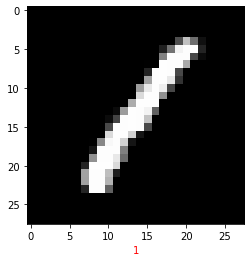

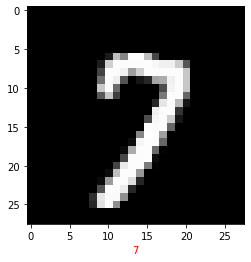

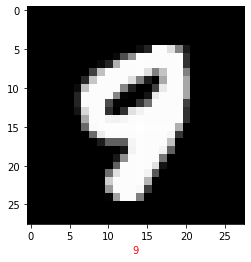

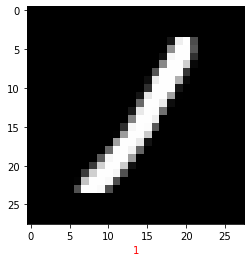

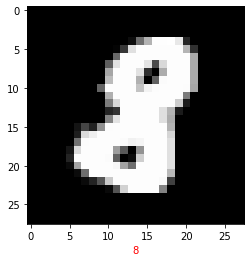

In [6]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(5):
    label = ""+str(y_test[i])
    plt.imshow(X_test[i], interpolation='nearest',cmap = 'gray')
    plt.xlabel(label,color='red')
    plt.show()
    
    
    


In [7]:
print("shape of train data before flattening" , X_train[0].shape)
print("shape of test data before flattening", X_test[0].shape)

def flatten(X):
    a = []
    for i in X:
        i = i.flatten()
        a.append(i)
    return np.array(a)
X_train = flatten(X_train)
X_test  = flatten(X_test)
print("shape of train data after flattening",(X_train[0].shape))
print("shape of test data after flattening",(X_test[0].shape))


shape of train data before flattening (28, 28, 1)
shape of test data before flattening (28, 28, 1)
shape of train data after flattening (784,)
shape of test data after flattening (784,)


In [8]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train),torch.tensor(y_train,dtype=torch.long))
test_dataset  = TensorDataset(torch.tensor(X_test),torch.tensor(y_test,dtype=torch.long))
train_dataloader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=64,shuffle=True)


In [9]:
import model1
import model2
import model3
import model4

In [10]:
m1_1 = model1.Model(5*10**-2,10**-3,200)
m1_1.compute(train_dataloader,test_dataloader)


epoch: 1/200,train_loss = 42.8398, test_loss = 15.9609 , train_acc = 33.43,test_acc = 45.33
epoch: 2/200,train_loss = 33.5897, test_loss = 14.7642 , train_acc = 50.57,test_acc = 54.33
epoch: 3/200,train_loss = 35.4037, test_loss = 16.8733 , train_acc = 46.36,test_acc = 39.67
epoch: 4/200,train_loss = 35.7975, test_loss = 15.8691 , train_acc = 45.43,test_acc = 47.00
epoch: 5/200,train_loss = 34.0860, test_loss = 14.8083 , train_acc = 47.00,test_acc = 52.33
epoch: 6/200,train_loss = 32.8477, test_loss = 15.4054 , train_acc = 49.50,test_acc = 45.83
epoch: 7/200,train_loss = 36.0526, test_loss = 19.2471 , train_acc = 40.79,test_acc = 29.67
epoch: 8/200,train_loss = 38.6112, test_loss = 16.5779 , train_acc = 36.57,test_acc = 38.83
epoch: 9/200,train_loss = 36.3278, test_loss = 16.7535 , train_acc = 39.29,test_acc = 44.17
epoch: 10/200,train_loss = 37.5105, test_loss = 17.1763 , train_acc = 41.36,test_acc = 44.17
epoch: 11/200,train_loss = 38.6432, test_loss = 18.3213 , train_acc = 36.79,tes

In [11]:
m1_1.test(test_dataloader)
m1_1.print_model_congiurations()

accuracy=17.666666666666668
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          39,250
           Sigmoid-2                   [-1, 50]               0
            Linear-3                   [-1, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


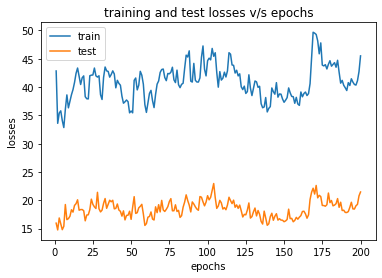

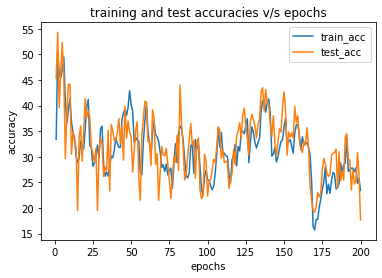

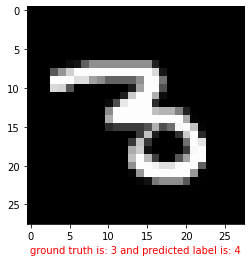

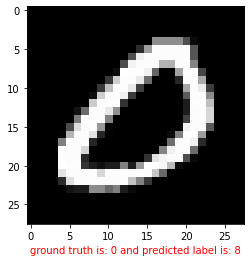

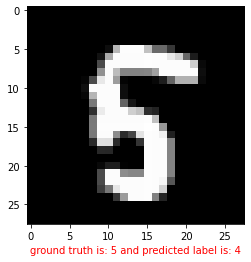

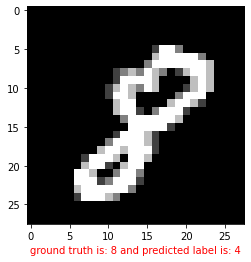

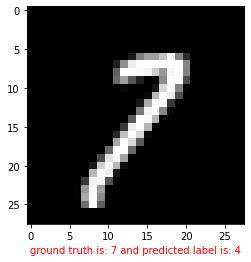

time taken:-  14.305148839950562  sec


In [12]:
m1_1.draw_graphs()
m1_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m1_1.time_took()," sec")

In [13]:
m1_2 = model1.Model(10**-3,10**-4,200)
m1_2.compute(train_dataloader,test_dataloader)


epoch: 1/200,train_loss = 45.9939, test_loss = 18.7316 , train_acc = 36.00,test_acc = 57.17
epoch: 2/200,train_loss = 37.2385, test_loss = 15.7103 , train_acc = 68.64,test_acc = 71.33
epoch: 3/200,train_loss = 32.0318, test_loss = 13.9016 , train_acc = 77.14,test_acc = 75.83
epoch: 4/200,train_loss = 27.8543, test_loss = 12.1282 , train_acc = 80.79,test_acc = 80.17
epoch: 5/200,train_loss = 24.4115, test_loss = 10.7810 , train_acc = 83.71,test_acc = 81.67
epoch: 6/200,train_loss = 22.1240, test_loss = 9.8922 , train_acc = 85.29,test_acc = 82.00
epoch: 7/200,train_loss = 19.7281, test_loss = 9.2828 , train_acc = 86.21,test_acc = 82.67
epoch: 8/200,train_loss = 17.7779, test_loss = 8.4851 , train_acc = 87.00,test_acc = 82.00
epoch: 9/200,train_loss = 16.3030, test_loss = 8.0198 , train_acc = 88.36,test_acc = 84.50
epoch: 10/200,train_loss = 14.5765, test_loss = 7.2592 , train_acc = 89.43,test_acc = 86.50
epoch: 11/200,train_loss = 13.6754, test_loss = 6.8067 , train_acc = 90.36,test_acc 

In [14]:
m1_2.test(test_dataloader)
m1_2.print_model_congiurations()

accuracy=89.16666666666667
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          39,250
           Sigmoid-2                   [-1, 50]               0
            Linear-3                   [-1, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


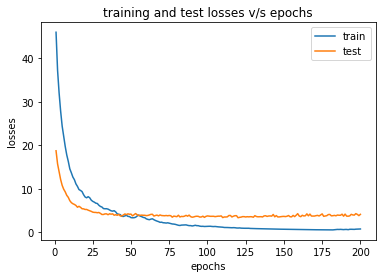

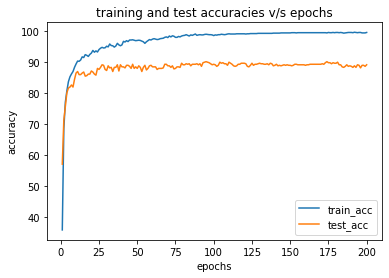

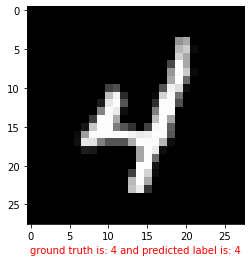

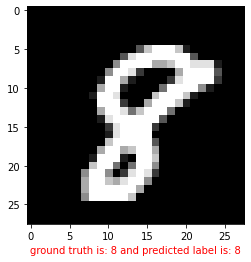

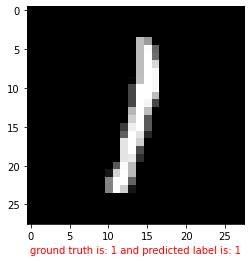

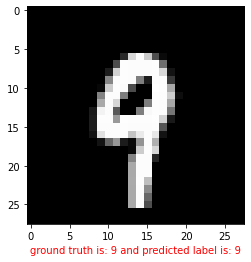

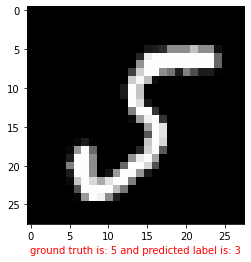

time taken:-  14.471040725708008  sec


In [15]:
m1_2.draw_graphs()
m1_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m1_2.time_took()," sec")

In [16]:
m1_3 = model1.Model(10**-4,10**-5,300)
m1_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 51.0174, test_loss = 22.4640 , train_acc = 13.07,test_acc = 15.17
epoch: 2/300,train_loss = 48.4464, test_loss = 21.7631 , train_acc = 22.79,test_acc = 25.33
epoch: 3/300,train_loss = 46.5820, test_loss = 21.0085 , train_acc = 36.00,test_acc = 33.83
epoch: 4/300,train_loss = 45.0224, test_loss = 20.4154 , train_acc = 45.86,test_acc = 44.00
epoch: 5/300,train_loss = 43.5901, test_loss = 19.7354 , train_acc = 51.57,test_acc = 49.33
epoch: 6/300,train_loss = 42.2956, test_loss = 19.2540 , train_acc = 56.71,test_acc = 51.50
epoch: 7/300,train_loss = 41.1386, test_loss = 18.8304 , train_acc = 59.00,test_acc = 52.67
epoch: 8/300,train_loss = 40.0377, test_loss = 18.3679 , train_acc = 62.86,test_acc = 57.33
epoch: 9/300,train_loss = 38.9232, test_loss = 17.8969 , train_acc = 66.36,test_acc = 62.33
epoch: 10/300,train_loss = 37.9209, test_loss = 17.4427 , train_acc = 70.21,test_acc = 64.17
epoch: 11/300,train_loss = 36.9955, test_loss = 17.0563 , train_acc = 72.93,tes

In [17]:
m1_3.test(test_dataloader)
m1_3.print_model_congiurations()

accuracy=87.83333333333333
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]          39,250
           Sigmoid-2                   [-1, 50]               0
            Linear-3                   [-1, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


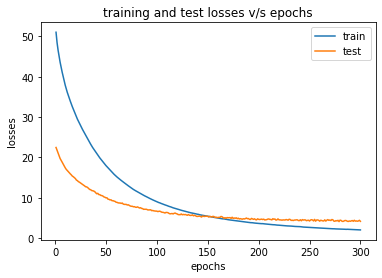

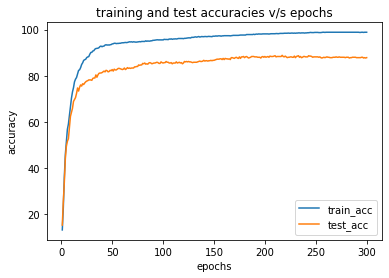

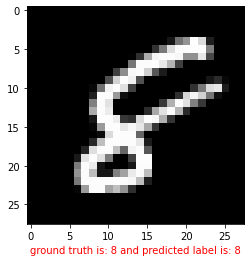

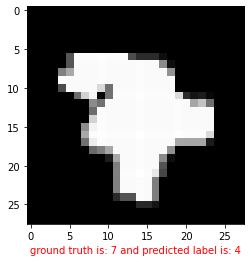

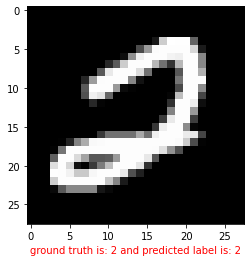

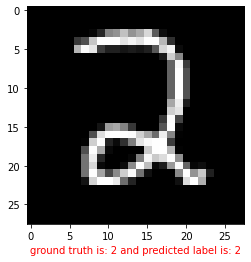

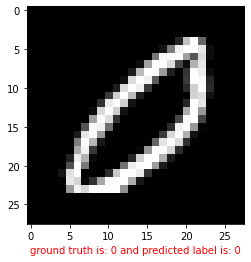

time taken:-  27.517278909683228  sec


In [18]:
m1_3.draw_graphs()
m1_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m1_3.time_took()," sec")

In [19]:
m2_1 = model2.Model(5*10**-2,10**-3,300)
m2_1.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 64.0004, test_loss = 23.4027 , train_acc = 9.57,test_acc = 9.67
epoch: 2/300,train_loss = 52.7417, test_loss = 24.9944 , train_acc = 12.43,test_acc = 11.00
epoch: 3/300,train_loss = 54.1452, test_loss = 24.1153 , train_acc = 11.29,test_acc = 12.50
epoch: 4/300,train_loss = 53.0935, test_loss = 23.0918 , train_acc = 10.79,test_acc = 9.33
epoch: 5/300,train_loss = 50.7000, test_loss = 23.2221 , train_acc = 17.14,test_acc = 13.00
epoch: 6/300,train_loss = 54.2857, test_loss = 23.7372 , train_acc = 12.14,test_acc = 9.33
epoch: 7/300,train_loss = 52.5460, test_loss = 25.3926 , train_acc = 12.43,test_acc = 21.83
epoch: 8/300,train_loss = 53.9146, test_loss = 24.5685 , train_acc = 14.50,test_acc = 16.67
epoch: 9/300,train_loss = 54.1246, test_loss = 22.8442 , train_acc = 12.07,test_acc = 9.33
epoch: 10/300,train_loss = 52.2541, test_loss = 25.4850 , train_acc = 15.64,test_acc = 13.50
epoch: 11/300,train_loss = 54.0722, test_loss = 25.5144 , train_acc = 13.00,test_acc

In [20]:
m2_1.test(test_dataloader)
m2_1.print_model_congiurations()

accuracy=9.333333333333334
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


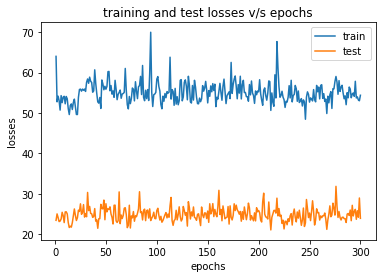

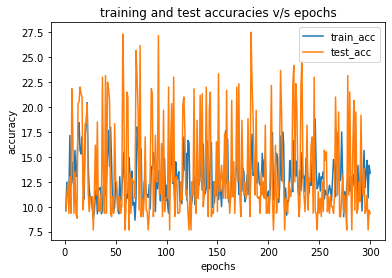

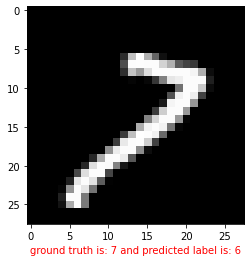

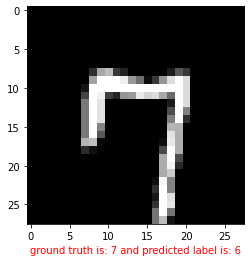

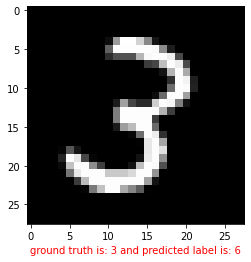

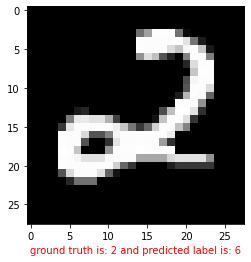

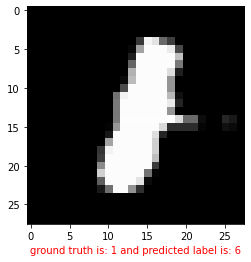

time taken:-  83.25369381904602  sec


In [21]:
m2_1.draw_graphs()
m2_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_1.time_took()," sec")

In [22]:
m2_2 = model2.Model(10**-3,10**-4,300)
m2_2.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 45.7895, test_loss = 17.6085 , train_acc = 38.29,test_acc = 58.00
epoch: 2/300,train_loss = 32.1464, test_loss = 12.0344 , train_acc = 70.43,test_acc = 73.00
epoch: 3/300,train_loss = 21.6229, test_loss = 8.5887 , train_acc = 81.29,test_acc = 82.00
epoch: 4/300,train_loss = 15.3333, test_loss = 6.5644 , train_acc = 87.50,test_acc = 85.67
epoch: 5/300,train_loss = 11.8715, test_loss = 5.5699 , train_acc = 89.93,test_acc = 87.00
epoch: 6/300,train_loss = 9.6688, test_loss = 4.9875 , train_acc = 91.14,test_acc = 86.67
epoch: 7/300,train_loss = 8.5013, test_loss = 4.8448 , train_acc = 92.07,test_acc = 87.67
epoch: 8/300,train_loss = 7.4135, test_loss = 4.2295 , train_acc = 93.14,test_acc = 89.00
epoch: 9/300,train_loss = 6.5583, test_loss = 4.0501 , train_acc = 93.29,test_acc = 90.17
epoch: 10/300,train_loss = 6.0144, test_loss = 3.9374 , train_acc = 93.71,test_acc = 89.33
epoch: 11/300,train_loss = 5.4778, test_loss = 3.9984 , train_acc = 94.36,test_acc = 89.17
e

In [23]:
m2_2.test(test_dataloader)
m2_2.print_model_congiurations()

accuracy=86.66666666666667
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


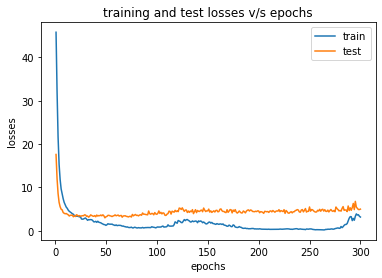

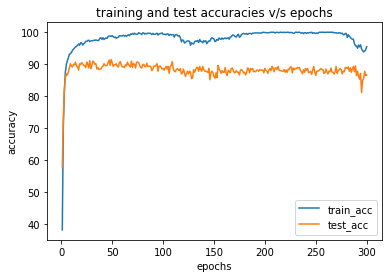

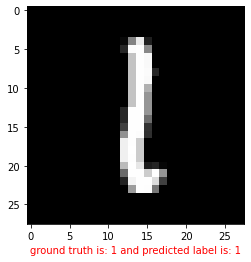

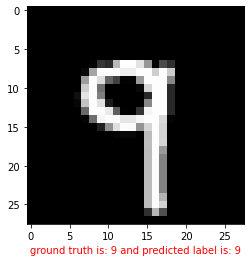

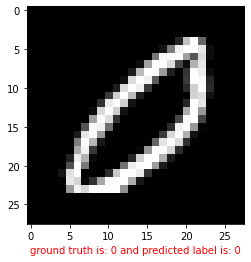

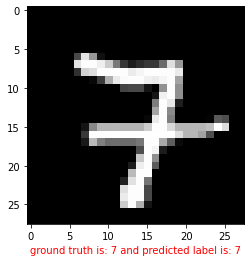

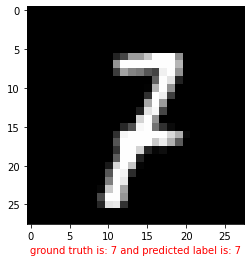

time taken:-  110.62331342697144  sec


In [24]:
m2_2.draw_graphs()
m2_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_2.time_took()," sec")

In [25]:
m2_3 = model2.Model(10**-4,10**-5,300)
m2_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 50.3767, test_loss = 22.3520 , train_acc = 13.07,test_acc = 29.00
epoch: 2/300,train_loss = 48.1211, test_loss = 21.5111 , train_acc = 46.14,test_acc = 54.83
epoch: 3/300,train_loss = 46.2311, test_loss = 20.6718 , train_acc = 63.50,test_acc = 63.67
epoch: 4/300,train_loss = 44.2160, test_loss = 19.8242 , train_acc = 68.43,test_acc = 67.67
epoch: 5/300,train_loss = 42.0274, test_loss = 18.8405 , train_acc = 71.14,test_acc = 68.17
epoch: 6/300,train_loss = 39.7603, test_loss = 17.8479 , train_acc = 73.71,test_acc = 69.83
epoch: 7/300,train_loss = 37.4369, test_loss = 16.8143 , train_acc = 76.43,test_acc = 70.83
epoch: 8/300,train_loss = 35.1669, test_loss = 15.9688 , train_acc = 78.29,test_acc = 73.50
epoch: 9/300,train_loss = 32.9711, test_loss = 15.0715 , train_acc = 80.57,test_acc = 75.00
epoch: 10/300,train_loss = 30.8824, test_loss = 14.2286 , train_acc = 83.21,test_acc = 76.50
epoch: 11/300,train_loss = 28.8858, test_loss = 13.4621 , train_acc = 84.50,tes

In [26]:
m2_3.test(test_dataloader)
m2_3.print_model_congiurations()

accuracy=89.33333333333333
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


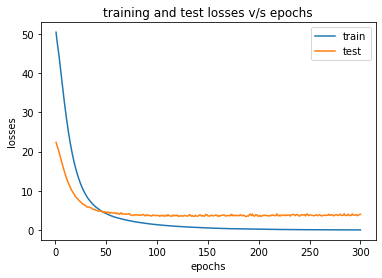

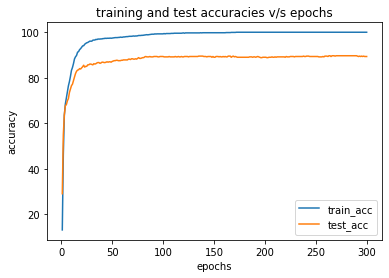

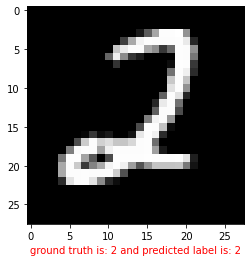

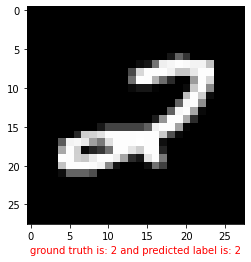

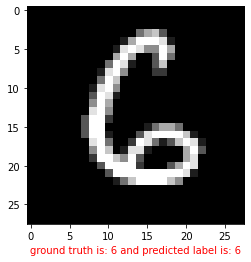

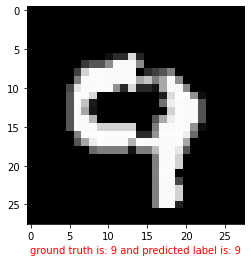

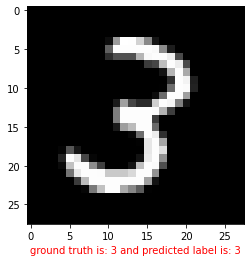

time taken:-  91.28409481048584  sec


In [27]:
m2_3.draw_graphs()
m2_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_3.time_took()," sec")

In [28]:
m3_1 = model3.Model(5*10**-2,10**-3,300)
m3_1.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 17873.2807, test_loss = 28.7569 , train_acc = 17.86,test_acc = 14.33
epoch: 2/300,train_loss = 66.2858, test_loss = 22.7095 , train_acc = 10.21,test_acc = 16.50
epoch: 3/300,train_loss = 68.5937, test_loss = 21.5801 , train_acc = 17.64,test_acc = 17.67
epoch: 4/300,train_loss = 46.5044, test_loss = 20.7038 , train_acc = 18.21,test_acc = 22.50
epoch: 5/300,train_loss = 45.3549, test_loss = 20.6244 , train_acc = 18.86,test_acc = 21.83
epoch: 6/300,train_loss = 44.5284, test_loss = 20.6062 , train_acc = 19.86,test_acc = 20.67
epoch: 7/300,train_loss = 44.3932, test_loss = 20.4013 , train_acc = 18.50,test_acc = 20.50
epoch: 8/300,train_loss = 43.7217, test_loss = 20.2915 , train_acc = 19.50,test_acc = 21.00
epoch: 9/300,train_loss = 43.9891, test_loss = 20.6455 , train_acc = 18.07,test_acc = 15.67
epoch: 10/300,train_loss = 43.8839, test_loss = 20.2262 , train_acc = 18.93,test_acc = 15.00
epoch: 11/300,train_loss = 47.8245, test_loss = 21.6691 , train_acc = 14.79,

In [29]:
m3_1.test(test_dataloader)
m3_1.print_model_congiurations()

accuracy=10.833333333333334
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
              ReLU-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


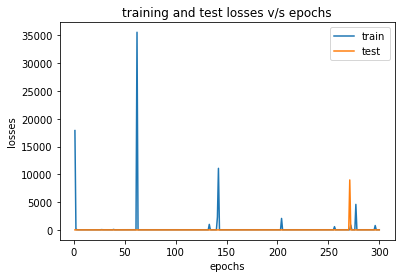

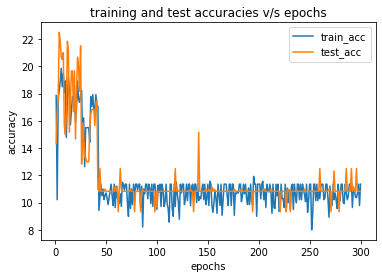

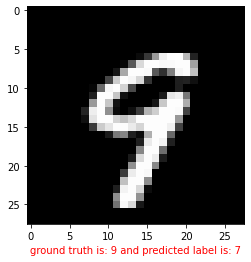

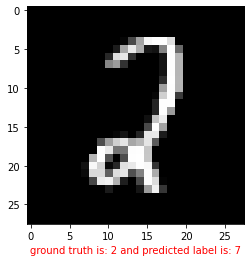

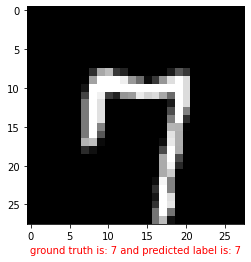

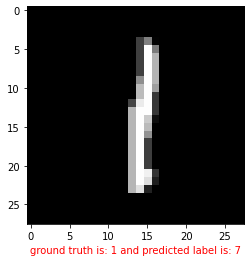

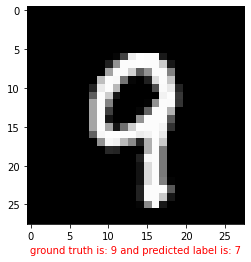

time taken:-  114.45826482772827  sec


In [30]:
m3_1.draw_graphs()
m3_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m3_1.time_took()," sec")

In [31]:
m3_2 = model3.Model(10**-3,10**-4,300)
m3_2.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 95.8666, test_loss = 7.6104 , train_acc = 62.07,test_acc = 80.50
epoch: 2/300,train_loss = 9.0861, test_loss = 4.9114 , train_acc = 88.86,test_acc = 88.83
epoch: 3/300,train_loss = 2.1857, test_loss = 4.1154 , train_acc = 96.71,test_acc = 89.50
epoch: 4/300,train_loss = 0.6302, test_loss = 4.0245 , train_acc = 99.50,test_acc = 89.50
epoch: 5/300,train_loss = 0.2196, test_loss = 4.0717 , train_acc = 100.00,test_acc = 90.17
epoch: 6/300,train_loss = 0.0958, test_loss = 4.2981 , train_acc = 100.00,test_acc = 90.17
epoch: 7/300,train_loss = 0.0567, test_loss = 4.1371 , train_acc = 100.00,test_acc = 90.67
epoch: 8/300,train_loss = 0.0422, test_loss = 4.2584 , train_acc = 100.00,test_acc = 90.33
epoch: 9/300,train_loss = 0.0343, test_loss = 4.0671 , train_acc = 100.00,test_acc = 90.83
epoch: 10/300,train_loss = 0.0288, test_loss = 4.2159 , train_acc = 100.00,test_acc = 90.83
epoch: 11/300,train_loss = 0.0248, test_loss = 4.1937 , train_acc = 100.00,test_acc = 91.00


In [32]:
m3_2.test(test_dataloader)
m3_2.print_model_congiurations()

accuracy=91.5
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
              ReLU-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


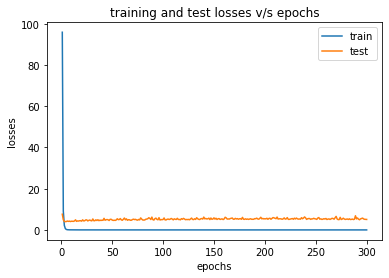

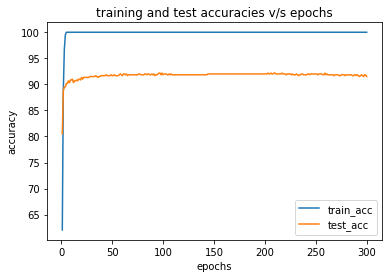

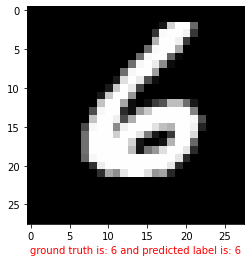

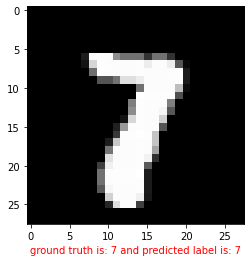

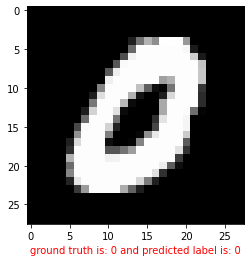

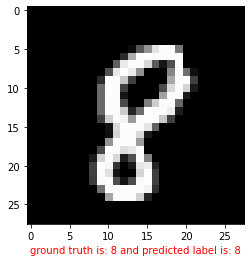

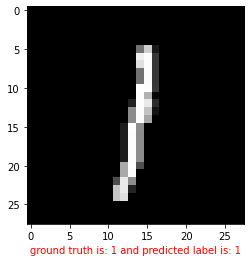

time taken:-  108.47829127311707  sec


In [33]:
m3_2.draw_graphs()
m3_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m3_2.time_took()," sec")

In [34]:
m3_3 = model3.Model(10**-4,10**-5,300)
m3_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 103.0758, test_loss = 17.0827 , train_acc = 38.43,test_acc = 64.33
epoch: 2/300,train_loss = 20.5630, test_loss = 10.4128 , train_acc = 77.50,test_acc = 76.83
epoch: 3/300,train_loss = 9.4435, test_loss = 7.8534 , train_acc = 88.21,test_acc = 79.50
epoch: 4/300,train_loss = 4.1404, test_loss = 7.4370 , train_acc = 94.79,test_acc = 80.83
epoch: 5/300,train_loss = 2.2950, test_loss = 7.4295 , train_acc = 97.64,test_acc = 81.67
epoch: 6/300,train_loss = 1.1603, test_loss = 6.9674 , train_acc = 99.50,test_acc = 82.83
epoch: 7/300,train_loss = 0.7350, test_loss = 6.3356 , train_acc = 99.79,test_acc = 82.83
epoch: 8/300,train_loss = 0.5067, test_loss = 6.4366 , train_acc = 99.93,test_acc = 83.83
epoch: 9/300,train_loss = 0.3602, test_loss = 6.7340 , train_acc = 99.93,test_acc = 84.33
epoch: 10/300,train_loss = 0.2841, test_loss = 6.8238 , train_acc = 100.00,test_acc = 84.83
epoch: 11/300,train_loss = 0.2369, test_loss = 6.1908 , train_acc = 100.00,test_acc = 84.83
e

In [35]:
m3_3.test(test_dataloader)
m3_3.print_model_congiurations()

accuracy=90.16666666666666
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
              ReLU-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


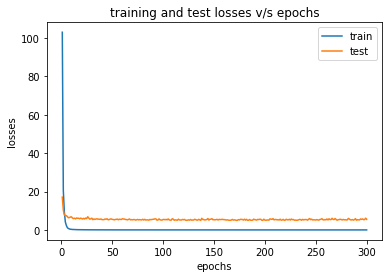

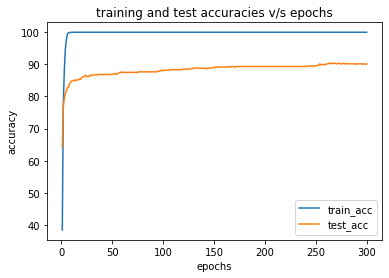

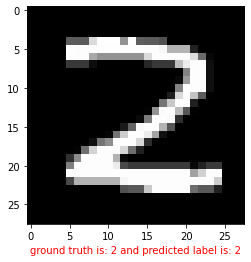

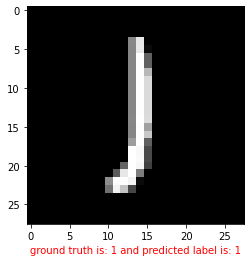

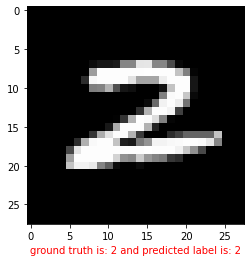

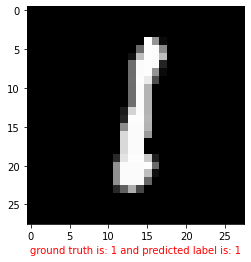

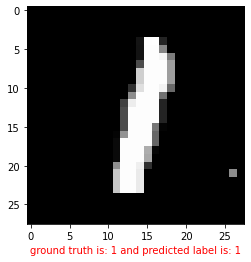

time taken:-  90.88203144073486  sec


In [36]:
m3_3.draw_graphs()
m3_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m3_3.time_took()," sec")

In [37]:
m4_1 = model4.Model(5*10**-2,10**-3,300)
m4_1.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 42.7860, test_loss = 9.8548 , train_acc = 41.64,test_acc = 69.50
epoch: 2/300,train_loss = 16.9264, test_loss = 5.7044 , train_acc = 76.07,test_acc = 82.00
epoch: 3/300,train_loss = 14.3077, test_loss = 8.2265 , train_acc = 79.43,test_acc = 73.50
epoch: 4/300,train_loss = 15.3062, test_loss = 6.6421 , train_acc = 79.07,test_acc = 80.50
epoch: 5/300,train_loss = 10.6377, test_loss = 6.5321 , train_acc = 84.93,test_acc = 78.83
epoch: 6/300,train_loss = 11.7410, test_loss = 5.6573 , train_acc = 81.64,test_acc = 83.33
epoch: 7/300,train_loss = 10.6950, test_loss = 6.6716 , train_acc = 84.71,test_acc = 79.83
epoch: 8/300,train_loss = 10.8515, test_loss = 6.8333 , train_acc = 83.79,test_acc = 79.17
epoch: 9/300,train_loss = 11.0712, test_loss = 7.3503 , train_acc = 84.00,test_acc = 77.50
epoch: 10/300,train_loss = 11.3213, test_loss = 6.1059 , train_acc = 84.00,test_acc = 81.83
epoch: 11/300,train_loss = 11.2943, test_loss = 6.0571 , train_acc = 83.00,test_acc = 80.

In [38]:
m4_1.test(test_dataloader)
m4_1.print_model_congiurations()

accuracy=80.33333333333333
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
       BatchNorm1d-2                  [-1, 400]             800
           Dropout-3                  [-1, 400]               0
              ReLU-4                  [-1, 400]               0
            Linear-5                  [-1, 200]          80,200
           Sigmoid-6                  [-1, 200]               0
            Linear-7                   [-1, 10]           2,010
Total params: 397,010
Trainable params: 397,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.51
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


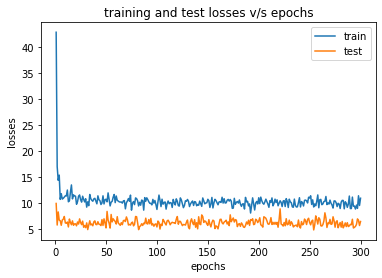

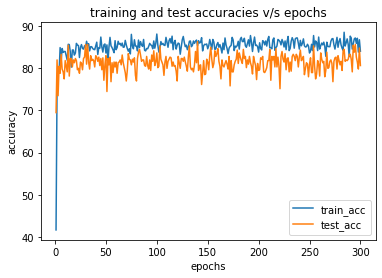

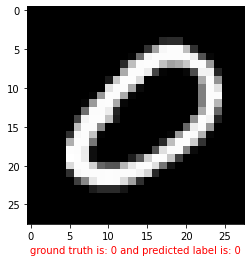

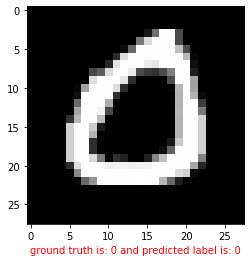

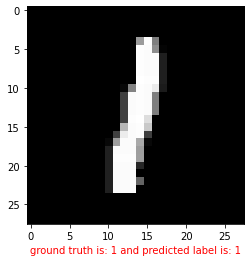

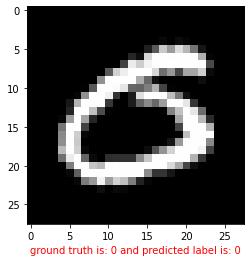

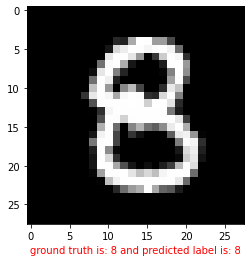

time taken:-  189.5992090702057  sec


In [39]:
m4_1.draw_graphs()
m4_1.print_first_five_preds(test_dataloader)
print("time taken:- ",m4_1.time_took()," sec")

In [40]:
m4_2 = model4.Model(10**-3,10**-4,300)
m4_2.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 37.5427, test_loss = 11.7300 , train_acc = 58.00,test_acc = 75.83
epoch: 2/300,train_loss = 19.1332, test_loss = 6.8611 , train_acc = 83.21,test_acc = 87.00
epoch: 3/300,train_loss = 11.0509, test_loss = 5.0031 , train_acc = 90.21,test_acc = 89.00
epoch: 4/300,train_loss = 7.2760, test_loss = 4.1116 , train_acc = 93.43,test_acc = 89.00
epoch: 5/300,train_loss = 5.3090, test_loss = 4.0989 , train_acc = 95.29,test_acc = 88.17
epoch: 6/300,train_loss = 3.9210, test_loss = 3.6834 , train_acc = 97.36,test_acc = 90.00
epoch: 7/300,train_loss = 2.9240, test_loss = 3.7041 , train_acc = 98.07,test_acc = 89.50
epoch: 8/300,train_loss = 2.0980, test_loss = 4.0307 , train_acc = 99.21,test_acc = 87.33
epoch: 9/300,train_loss = 1.6399, test_loss = 4.0730 , train_acc = 99.36,test_acc = 87.67
epoch: 10/300,train_loss = 1.3681, test_loss = 3.5061 , train_acc = 99.57,test_acc = 89.50
epoch: 11/300,train_loss = 1.0567, test_loss = 3.7378 , train_acc = 99.86,test_acc = 88.17
epoc

In [41]:
m4_2.test(test_dataloader)
m4_2.print_model_congiurations()

accuracy=91.16666666666666
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
       BatchNorm1d-2                  [-1, 400]             800
           Dropout-3                  [-1, 400]               0
              ReLU-4                  [-1, 400]               0
            Linear-5                  [-1, 200]          80,200
           Sigmoid-6                  [-1, 200]               0
            Linear-7                   [-1, 10]           2,010
Total params: 397,010
Trainable params: 397,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.51
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


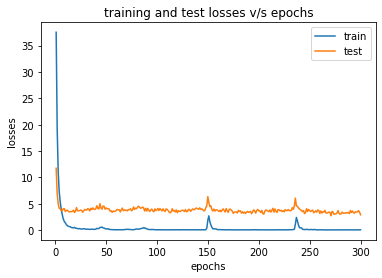

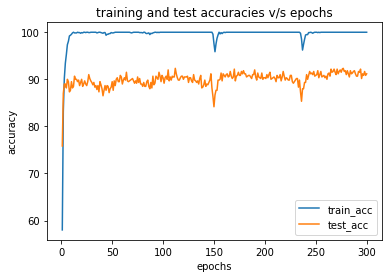

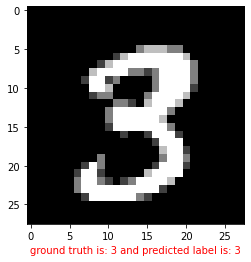

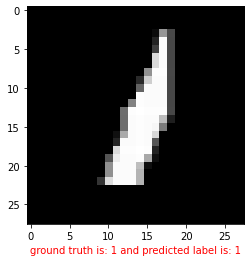

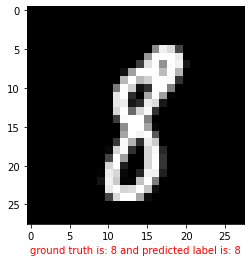

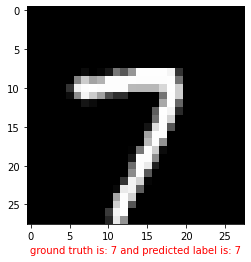

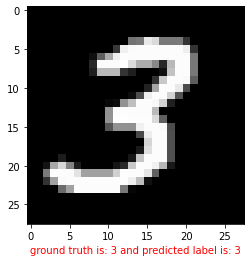

time taken:-  110.45330452919006  sec


In [42]:
m4_2.draw_graphs()
m4_2.print_first_five_preds(test_dataloader)
print("time taken:- ",m4_2.time_took()," sec")

In [43]:
m4_3 = model4.Model(10**-4,10**-5,300)
m4_3.compute(train_dataloader,test_dataloader)


epoch: 1/300,train_loss = 48.9618, test_loss = 21.3096 , train_acc = 23.93,test_acc = 43.83
epoch: 2/300,train_loss = 44.6716, test_loss = 19.5650 , train_acc = 65.36,test_acc = 69.17
epoch: 3/300,train_loss = 40.9773, test_loss = 17.9131 , train_acc = 72.29,test_acc = 70.33
epoch: 4/300,train_loss = 37.4057, test_loss = 16.5131 , train_acc = 74.71,test_acc = 73.17
epoch: 5/300,train_loss = 34.1827, test_loss = 15.1229 , train_acc = 77.36,test_acc = 74.83
epoch: 6/300,train_loss = 31.1123, test_loss = 13.8362 , train_acc = 79.71,test_acc = 78.17
epoch: 7/300,train_loss = 28.4150, test_loss = 12.7361 , train_acc = 80.71,test_acc = 80.17
epoch: 8/300,train_loss = 26.1040, test_loss = 11.7386 , train_acc = 83.50,test_acc = 82.33
epoch: 9/300,train_loss = 23.7901, test_loss = 10.9488 , train_acc = 85.36,test_acc = 83.50
epoch: 10/300,train_loss = 21.7715, test_loss = 10.1242 , train_acc = 87.43,test_acc = 84.17
epoch: 11/300,train_loss = 20.1018, test_loss = 9.4874 , train_acc = 88.00,test

In [44]:
m4_3.test(test_dataloader)
m4_3.print_model_congiurations()

accuracy=86.33333333333333
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
       BatchNorm1d-2                  [-1, 400]             800
           Dropout-3                  [-1, 400]               0
              ReLU-4                  [-1, 400]               0
            Linear-5                  [-1, 200]          80,200
           Sigmoid-6                  [-1, 200]               0
            Linear-7                   [-1, 10]           2,010
Total params: 397,010
Trainable params: 397,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.51
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


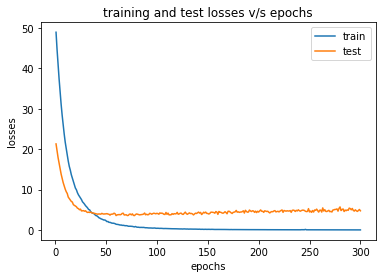

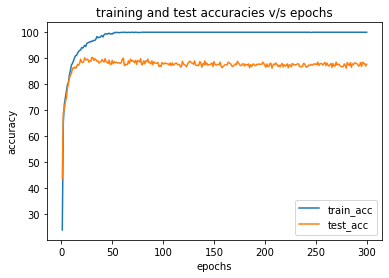

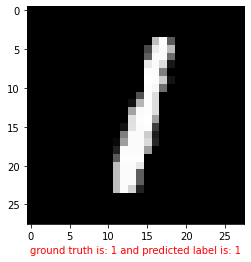

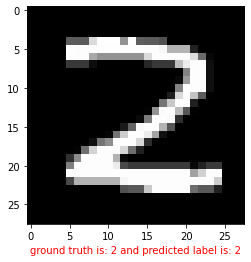

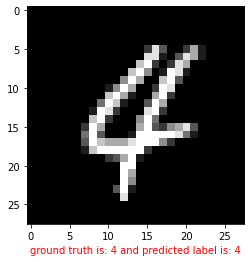

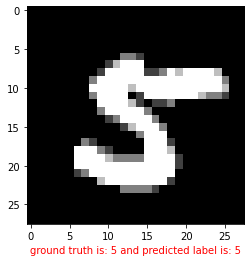

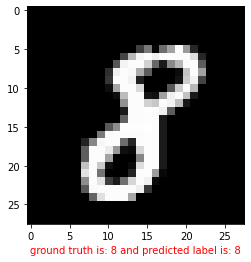

time taken:-  102.62422633171082  sec


In [45]:
m4_3.draw_graphs()
m4_3.print_first_five_preds(test_dataloader)
print("time taken:- ",m4_3.time_took()," sec")

In [46]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train),torch.tensor(y_train,dtype=torch.long))
test_dataset  = TensorDataset(torch.tensor(X_test),torch.tensor(y_test,dtype=torch.long))
train_dataloader_256 = DataLoader(train_dataset,batch_size=256,shuffle=True)
test_dataloader_256 = DataLoader(test_dataset,batch_size=256,shuffle=True)


In [47]:
m2_2_256 = model2.Model(10**-3,10**-4,300)
m2_2_256.compute(train_dataloader_256,test_dataloader_256)

epoch: 1/300,train_loss = 13.3807, test_loss = 6.2107 , train_acc = 25.29,test_acc = 52.17
epoch: 2/300,train_loss = 11.7455, test_loss = 5.4238 , train_acc = 60.36,test_acc = 65.67
epoch: 3/300,train_loss = 10.1389, test_loss = 4.6673 , train_acc = 68.79,test_acc = 72.00
epoch: 4/300,train_loss = 8.5444, test_loss = 3.9489 , train_acc = 78.07,test_acc = 77.33
epoch: 5/300,train_loss = 7.0532, test_loss = 3.2393 , train_acc = 81.57,test_acc = 80.00
epoch: 6/300,train_loss = 5.8210, test_loss = 2.7940 , train_acc = 86.36,test_acc = 83.67
epoch: 7/300,train_loss = 4.8323, test_loss = 2.3816 , train_acc = 89.00,test_acc = 86.67
epoch: 8/300,train_loss = 4.0229, test_loss = 2.0707 , train_acc = 90.86,test_acc = 86.50
epoch: 9/300,train_loss = 3.3176, test_loss = 1.8274 , train_acc = 91.50,test_acc = 87.50
epoch: 10/300,train_loss = 2.8255, test_loss = 1.7034 , train_acc = 92.07,test_acc = 87.50
epoch: 11/300,train_loss = 2.4397, test_loss = 1.4788 , train_acc = 93.29,test_acc = 87.67
epoch

In [48]:
m2_2_256.test(test_dataloader_256)
m2_2_256.print_model_congiurations()

accuracy=90.66666666666666
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


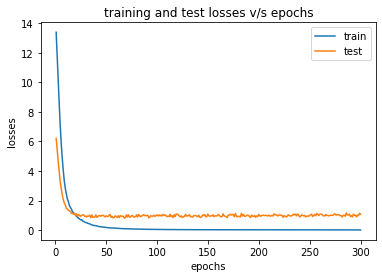

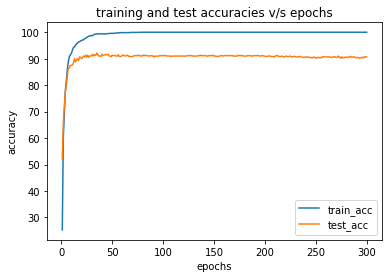

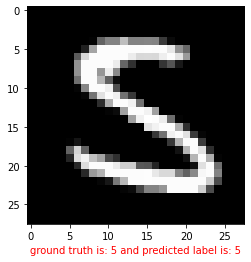

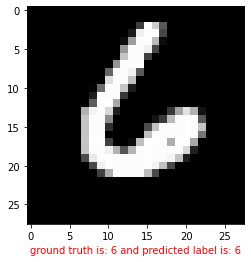

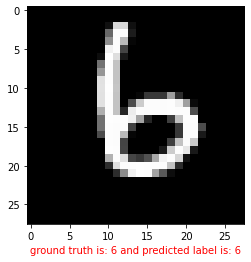

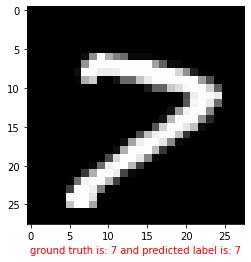

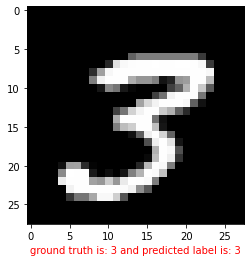

time taken:-  44.61769890785217  sec


In [49]:
m2_2_256.draw_graphs()
m2_2_256.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_2_256.time_took()," sec")

In [50]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train),torch.tensor(y_train,dtype=torch.long))
test_dataset  = TensorDataset(torch.tensor(X_test),torch.tensor(y_test,dtype=torch.long))
train_dataloader_512 = DataLoader(train_dataset,batch_size=512,shuffle=True)
test_dataloader_512 = DataLoader(test_dataset,batch_size=512,shuffle=True)


In [51]:
m2_2_512 = model2.Model(10**-3,10**-4,300)
m2_2_512.compute(train_dataloader_512,test_dataloader_512)

epoch: 1/300,train_loss = 6.8429, test_loss = 4.3393 , train_acc = 23.07,test_acc = 35.33
epoch: 2/300,train_loss = 6.3884, test_loss = 4.0623 , train_acc = 30.43,test_acc = 51.00
epoch: 3/300,train_loss = 5.9297, test_loss = 3.7801 , train_acc = 58.14,test_acc = 68.50
epoch: 4/300,train_loss = 5.4805, test_loss = 3.4887 , train_acc = 70.36,test_acc = 73.50
epoch: 5/300,train_loss = 5.0137, test_loss = 3.1891 , train_acc = 74.86,test_acc = 73.67
epoch: 6/300,train_loss = 4.5339, test_loss = 2.8407 , train_acc = 76.50,test_acc = 74.67
epoch: 7/300,train_loss = 4.0729, test_loss = 2.6462 , train_acc = 78.64,test_acc = 75.83
epoch: 8/300,train_loss = 3.6319, test_loss = 2.3845 , train_acc = 81.64,test_acc = 78.50
epoch: 9/300,train_loss = 3.2121, test_loss = 2.0810 , train_acc = 84.93,test_acc = 80.67
epoch: 10/300,train_loss = 2.8479, test_loss = 1.9668 , train_acc = 87.50,test_acc = 83.67
epoch: 11/300,train_loss = 2.5091, test_loss = 1.7883 , train_acc = 88.71,test_acc = 84.83
epoch: 1

In [52]:
m2_2_512.test(test_dataloader_512)
m2_2_512.print_model_congiurations()

accuracy=90.66666666666666
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.51
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


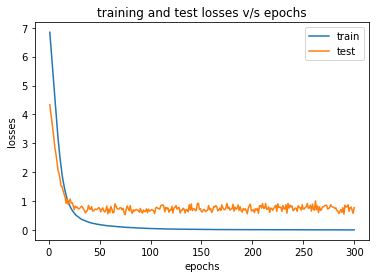

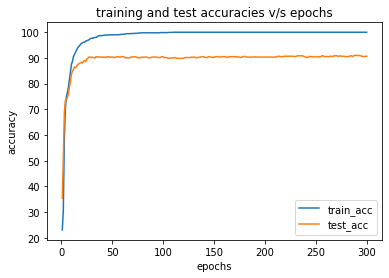

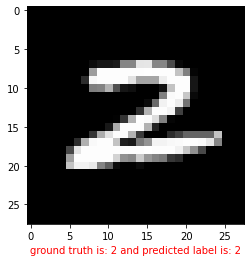

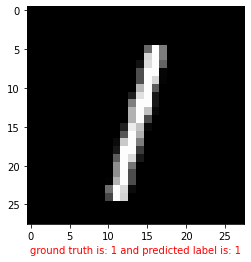

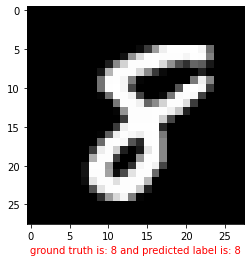

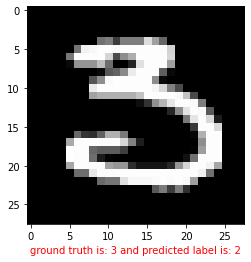

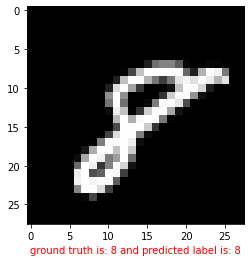

time taken:-  35.79702043533325  sec


In [53]:
m2_2_512.draw_graphs()
m2_2_512.print_first_five_preds(test_dataloader)
print("time taken:- ",m2_2_512.time_took()," sec")